# **WEATHER FORECASTING**

## **Importing Packages**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

from sklearn.preprocessing import MinMaxScaler  as mms
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
df_train = pd.read_csv("/content/DailyDelhiClimateTrain.csv")
df_test = pd.read_csv("/content/DailyDelhiClimateTest.csv")

In [ ]:
df_train.set_index('date')
df_test.set_index('date')

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [ ]:
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
df_train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [ ]:
df_train.head()


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
series = df_train.drop(['date','humidity','wind_speed','meanpressure'], axis=1)
series.head()

X_train, X_valid, Y_train, Y_valid = train_test_split(series, series.values, test_size=0.4, random_state=0)
print('Train set shape', X_train.shape)
print('Validation set shape', X_valid.shape)

Train set shape (877, 1)
Validation set shape (585, 1)


# **Data Visualization**

In [ ]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(16, 12))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
),
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=True,
)

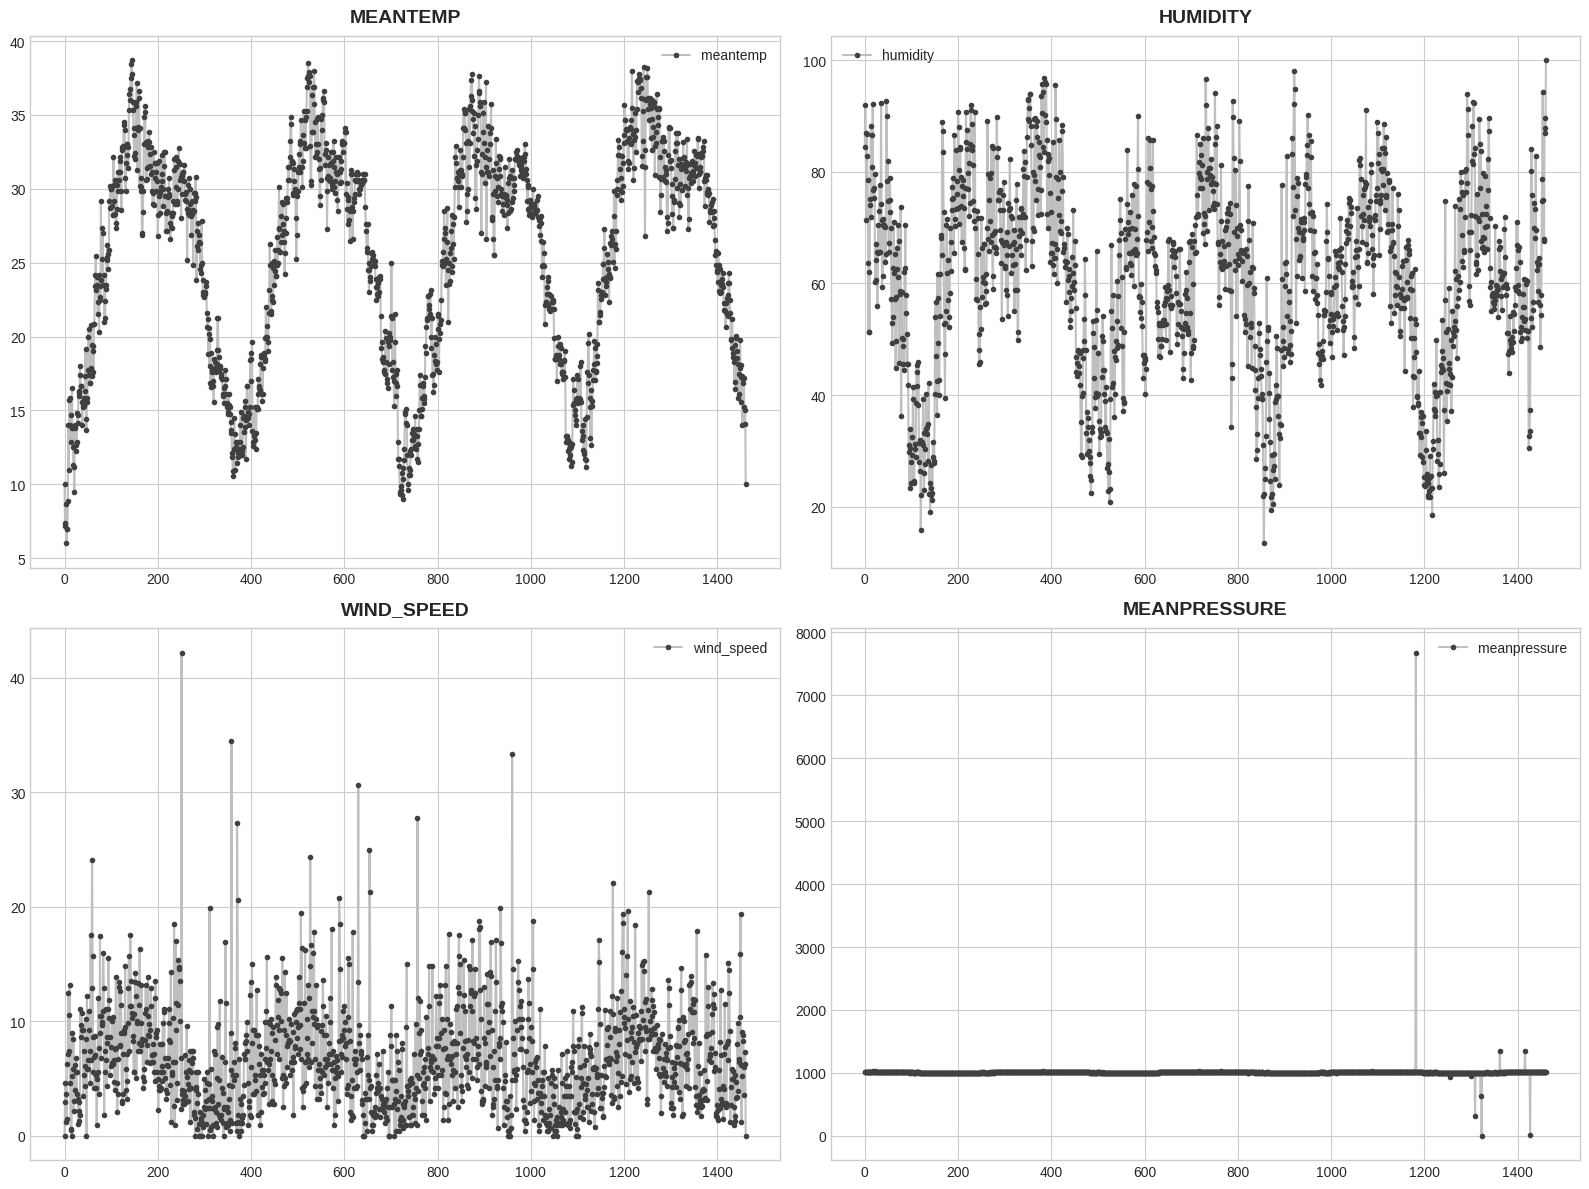

In [ ]:
cols = ['meantemp', 'humidity',	'wind_speed',	'meanpressure']

for n, col in enumerate(cols):
    # add a new subplot iteratively
    ax = plt.subplot(2, 2, n + 1)

    # filter df and plot ticker on the new subplot axis
    df_train[col].plot(ax=ax,**plot_params)

    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")

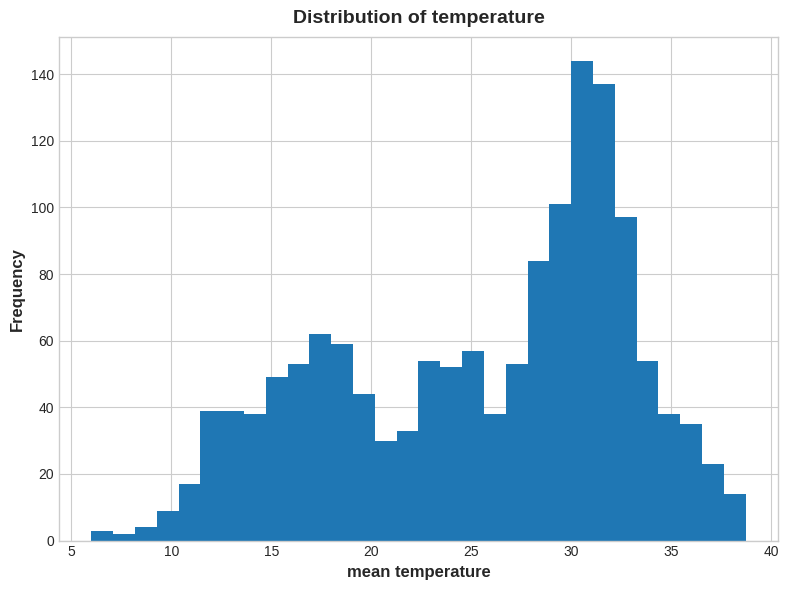

In [ ]:
# Visualize the distribution of rainfall using a histogram
plt.figure(figsize=(8,6))
plt.hist(df_train['meantemp'], bins=30)
plt.xlabel('mean temperature')
plt.ylabel('Frequency')
plt.title('Distribution of temperature')
plt.show()

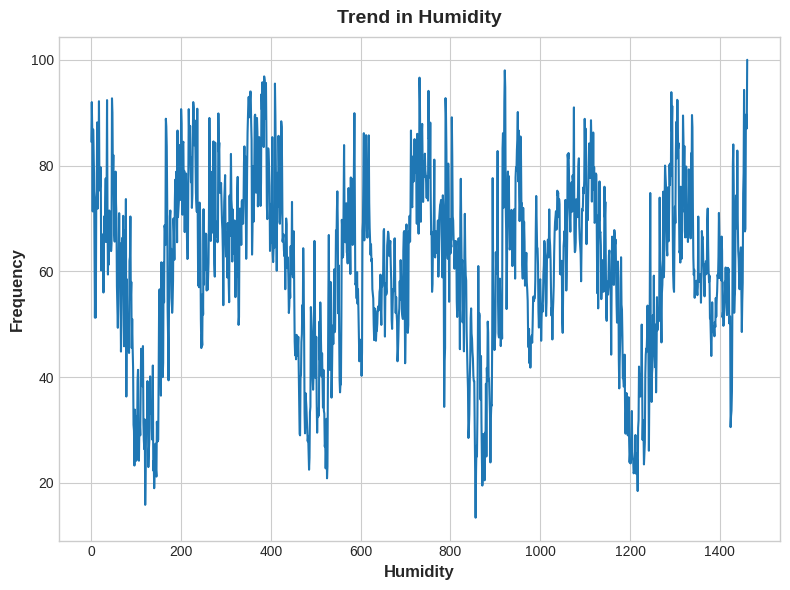

In [ ]:
# Visualize the trend in rainfall over time using a line plot
plt.figure(figsize=(8,6))
plt.plot(df_train.index, df_train['humidity'])
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Trend in Humidity')
plt.show()


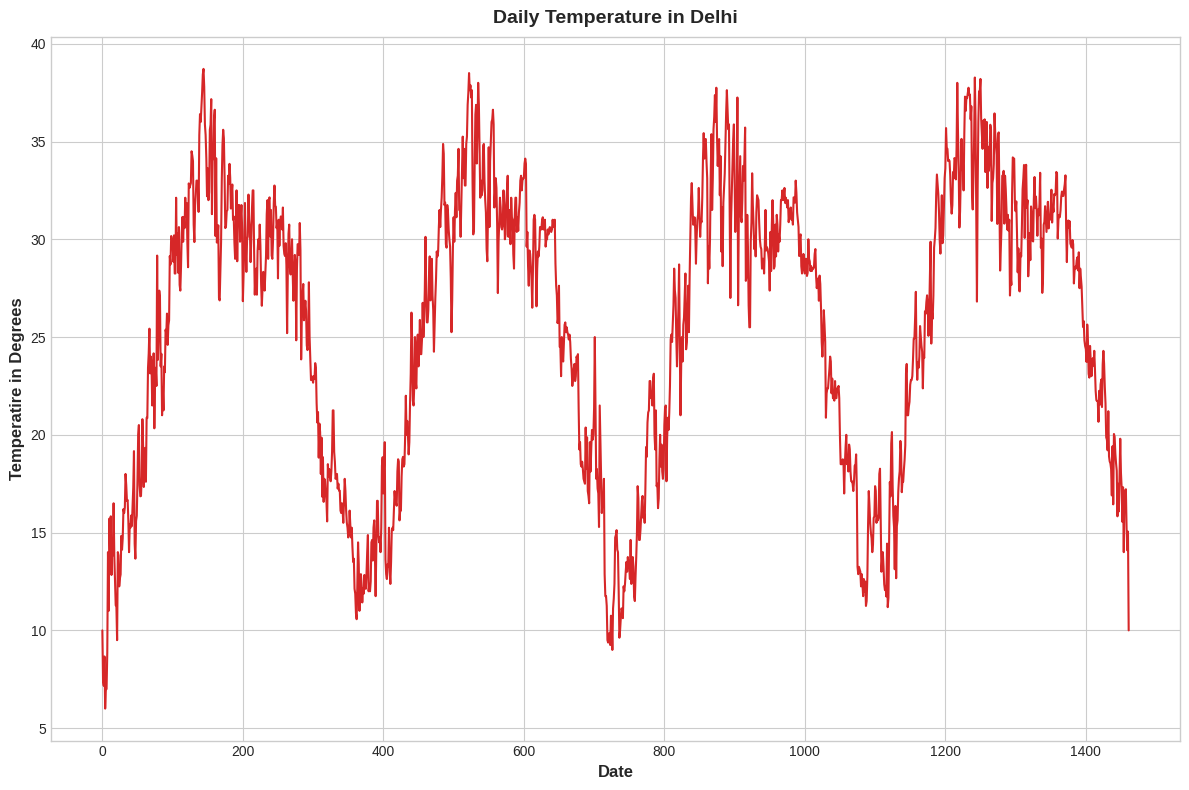

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,df_train.meantemp,color='tab:red')
plt.gca().set(title="Daily Temperature in Delhi",xlabel='Date',ylabel='Temperatire in Degrees')
plt.show()

<Axes: >

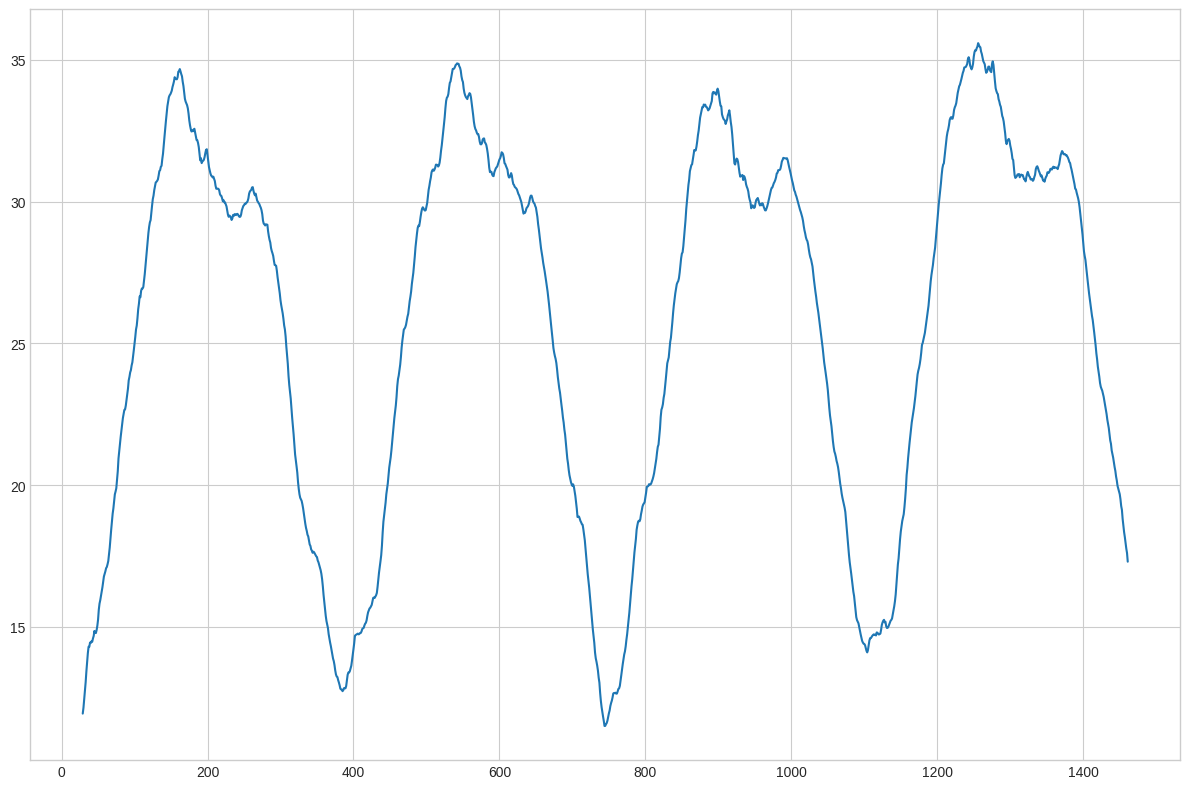

In [ ]:
#aplly the moving average function by a size of 30 days
temp_mean = df_train.meantemp.rolling(window=30).mean()
temp_mean.plot(figsize=(12,8))

# **Data Preprocessing**
Handle Missing Values


In [ ]:
df_train.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

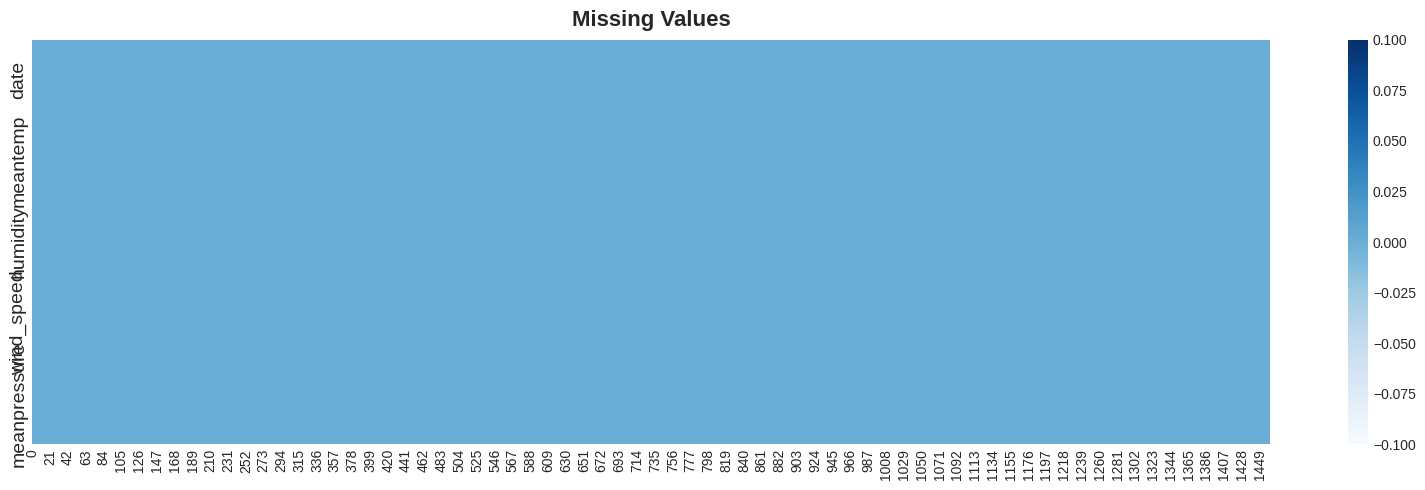

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(df_train.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

# **Stationary Check**


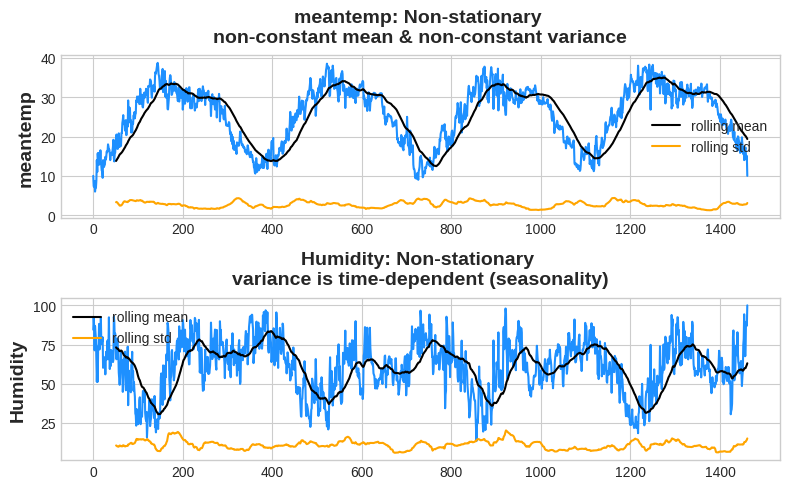

In [ ]:
rolling_window = 52
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 5))

sns.lineplot(x=df_train.index, y=df_train['meantemp'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=df_train.index, y=df_train['meantemp'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=df_train.index, y=df_train['meantemp'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
ax[0].set_title('meantemp: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0].set_ylabel(ylabel='meantemp', fontsize=14)
#ax[0].set_xlim([df.index(2009, 1, 1), df.index(2020, 6, 30)])

sns.lineplot(x=df_train.index, y=df_train['humidity'], ax=ax[1], color='dodgerblue')
sns.lineplot(x=df_train.index, y=df_train['humidity'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=df_train.index, y=df_train['humidity'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
ax[1].set_title('Humidity: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1].set_ylabel(ylabel='Humidity', fontsize=14)
#ax[1].set_xlim([df.index(2009, 1, 1), df.index(2020, 6, 30)])

plt.tight_layout()
plt.show()

1.Augmented Dickey Fuller test (ADH Test)

In [ ]:
from statsmodels.tsa.stattools import adfuller
groundwater = pd.DataFrame(df_train['meantemp'])

def adf_test(series,title=''):

    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())

    if result[1] <= 0.05: #accept the alternate hypothesis
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
adf_test(df_train['meantemp'],title='Temperature')

Augmented Dickey-Fuller Test: Temperature
ADF test statistic        -2.021069
p-value                    0.277412
# lags used               10.000000
# observations          1451.000000
critical value (1%)       -3.434865
critical value (5%)       -2.863534
critical value (10%)      -2.567832
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


 2.Kwiatkowski–Phillips–Schmidt–Shin (kpss) Test

In [ ]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )

    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

    if  kpsstest[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
kpss_test(df_train['meantemp'])

Results of KPSS Test:
Test Statistic            0.187864
p-value                   0.100000
Lags Used                25.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


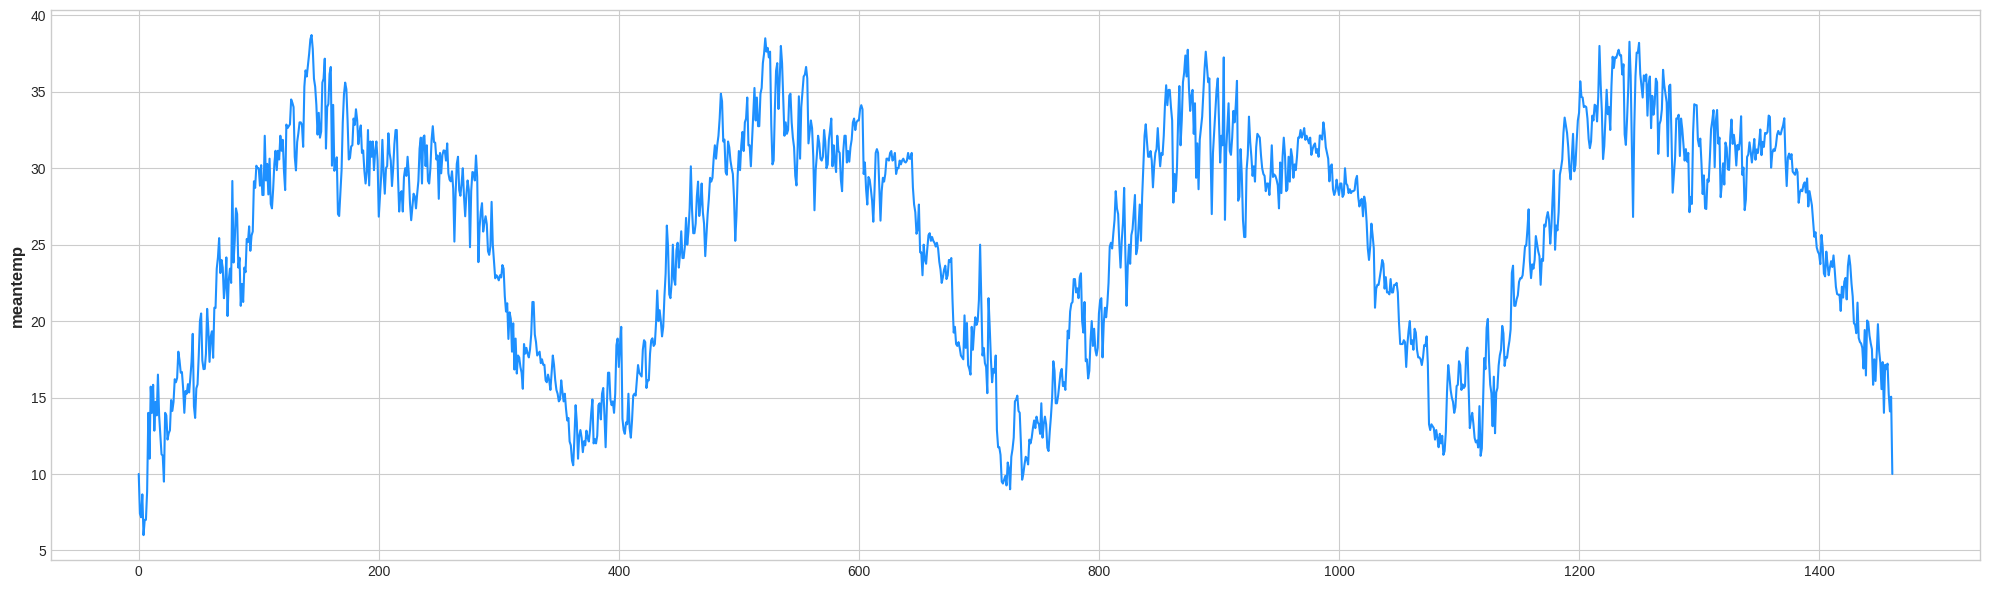

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))
sns.lineplot(x=df_train.index, y=df_train['meantemp'], color='dodgerblue')
#ax.set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()

Transformation by logTransfer

In [ ]:
df_train['meantemp'] = np.log(abs(df_train['meantemp']))

DeTrending by Differencing

<Axes: >

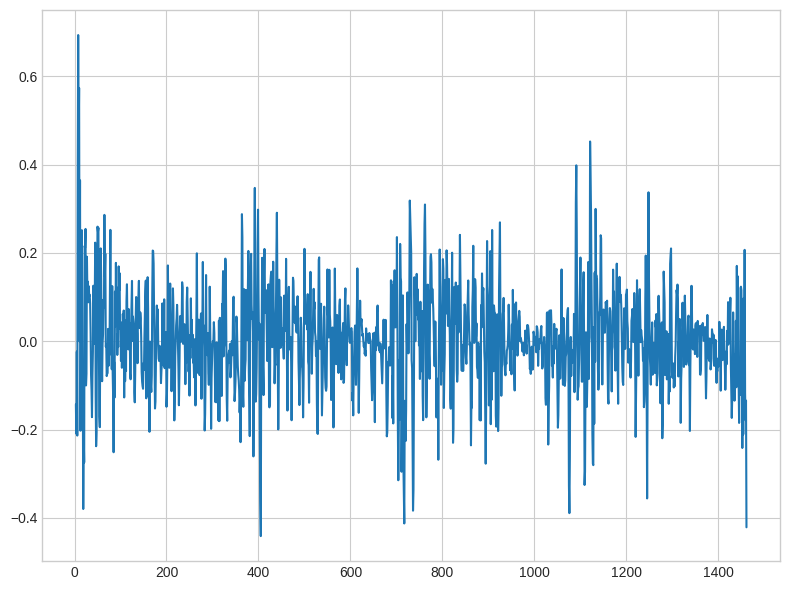

In [ ]:
meantemp_diff = df_train['meantemp'] - df_train['meantemp'].shift(3)
meantemp_diff.dropna().plot(figsize=(8, 6))

In [ ]:
#ADF test is now applied on these detrended values and stationarity is checked.
adf_test(meantemp_diff,title='meantemp_diff')


Augmented Dickey-Fuller Test: meantemp_diff
ADF test statistic     -6.379103e+00
p-value                 2.245300e-08
# lags used             2.400000e+01
# observations          1.434000e+03
critical value (1%)    -3.434918e+00
critical value (5%)    -2.863558e+00
critical value (10%)   -2.567844e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


# **Exploratory Data Analysis**

In [ ]:
import plotly.express as px
figure = px.line(df_train, x=df_train.index,
                 y="meantemp",
                 title='Mean Temperature in Delhi Over the Years')
figure.show()

In [ ]:
figure = px.scatter(data_frame = df_train
                    , x="humidity",
                    y="meantemp", size="meantemp",
                    trendline="ols",
                    title = "Relationship Between Temperature and Humidity")
figure.show()

In [ ]:
for col in cols:
    seasonal_decompose(df_train[col],period=12).plot()

## Autocorrelation Analysis

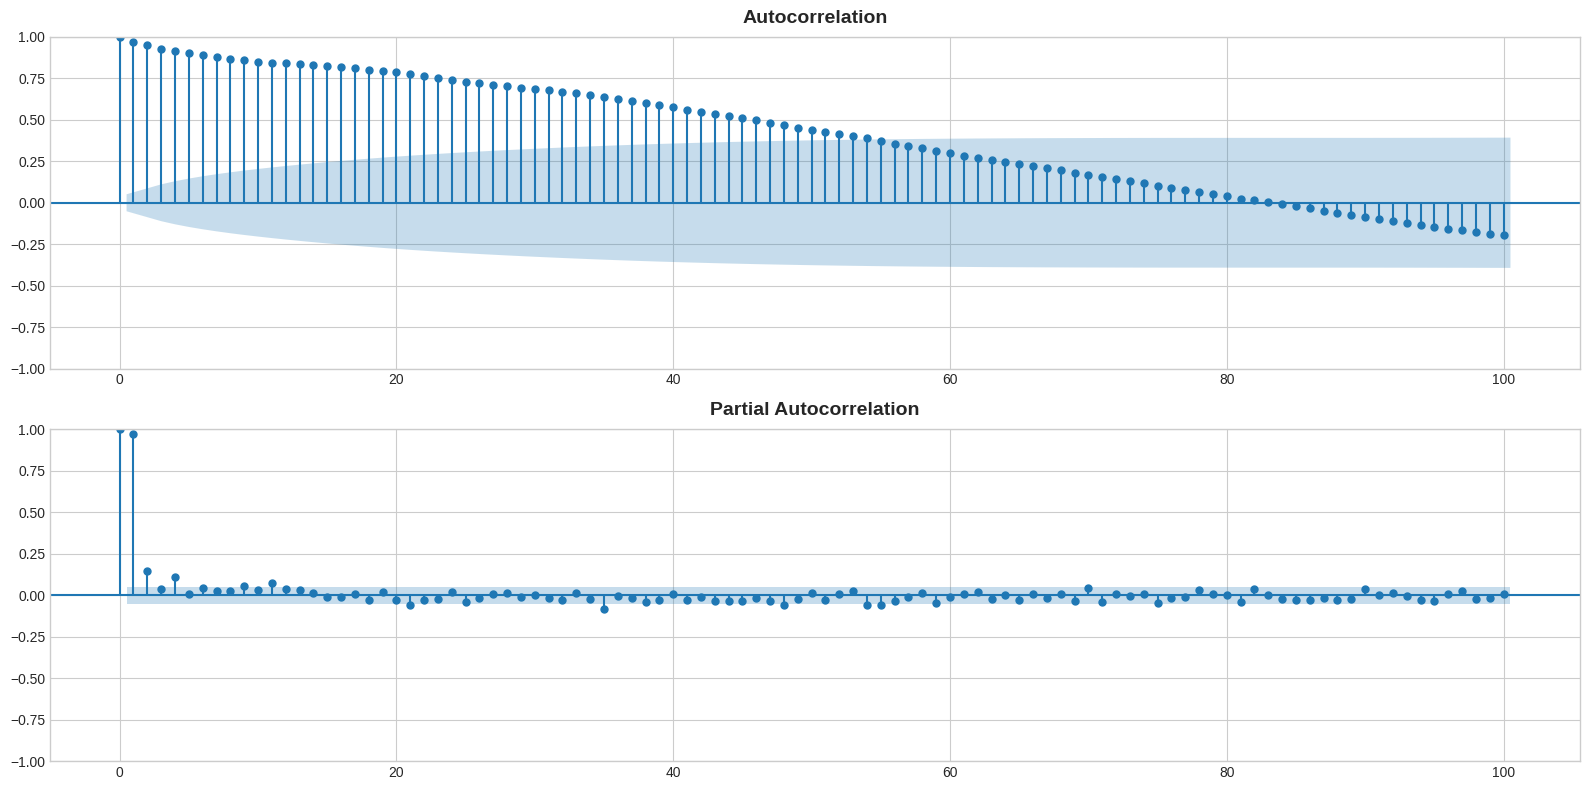

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df_train['meantemp'], lags =100, ax=ax[0])
plot_pacf(df_train['meantemp'], lags=100, ax=ax[1])

plt.show()

# **Model Building**

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df_train.index
y = df_train['meantemp']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

from sklearn.model_selection import train_test_split

# Split the data into train and validation sets
X_train, X_valid, Y_train, Y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(
        x=X_train,
        y=y_train,
        ax=ax[i,0],
        color='dodgerblue',
        label='train'
    )
    sns.lineplot(
        x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))],
        y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))],
        ax=ax[i,1],
        color='dodgerblue',
        label='train'
    )

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

plt.tight_layout()
plt.show()

## 1.Auto-Regressive Model

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df_train.meantemp, order=(1,0,0))
model_fitted = model.fit()

# Prediction with ARIMA
y_pred = model_fitted.forecast(steps=len(df_test))
y_pred_reshaped = y_pred.values.reshape(-1, 1)

# Calcuate metrics
ar_score_mae = mean_absolute_error(df_test.meantemp, y_pred_reshaped)
ar_score_rmse = math.sqrt(mean_squared_error(df_test.meantemp, y_pred_reshaped))

print('RMSE: {}'.format(ar_score_rmse))
print('MAE: {}'.format(ar_score_mae))

RMSE: 19.864415399501354
MAE: 18.88157232999287


In [ ]:
fig = plt.figure(figsize=(8, 5))
fig = model_fitted.plot_diagnostics(fig=fig, lags=30)

In [ ]:
y_input = df_train['meantemp'].values

y_pred = model_fitted.forecast(steps=len(y_input))

# Print the predicted values
print(y_pred)

1462    2.320521
1463    2.338072
1464    2.355244
1465    2.372048
1466    2.388489
          ...   
2919    3.136173
2920    3.136173
2921    3.136173
2922    3.136173
2923    3.136173
Name: predicted_mean, Length: 1462, dtype: float64


## 2.Moving-Average Model

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df_train.meantemp, order=(0,0,1))
model_fitted = model.fit()
# Prediction with ARIMA
y_pred = model_fitted.forecast(steps=len(df_test))


y_pred_reshaped = y_pred.values.reshape(-1, 1)

# Calcuate metrics
ma_score_mae = mean_absolute_error(df_test.meantemp, y_pred_reshaped)
ma_score_rmse = math.sqrt(mean_squared_error(df_test.meantemp, y_pred_reshaped))

print('RMSE: {}'.format(ma_score_rmse))
print('MAE: {}'.format(ma_score_mae))

RMSE: 19.58085406024214
MAE: 18.530073061770327


In [ ]:
y_input = df_train['meantemp'].values

y_pred = model_fitted.forecast(steps=len(y_input))

# Print the predicted values
print(y_pred)

1462    2.679471
1463    3.187462
1464    3.187462
1465    3.187462
1466    3.187462
          ...   
2919    3.187462
2920    3.187462
2921    3.187462
2922    3.187462
2923    3.187462
Name: predicted_mean, Length: 1462, dtype: float64


## 3.ARIMA Model


In [ ]:
# Fit model
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df_train.meantemp, order=(1,1,1))
model_fit = model.fit()

# Prediction with ARIMA
y_pred = model_fit.forecast(steps=len(df_test))
y_pred_reshaped = y_pred.values.reshape(-1, 1)

# Calcuate metrics
arima_score_mae = mean_absolute_error(df_test.meantemp, y_pred_reshaped)
arima_score_rmse = math.sqrt(mean_squared_error(df_test.meantemp, y_pred_reshaped))

print('RMSE: {}'.format(arima_score_rmse))
print('MAE: {}'.format(arima_score_mae))

RMSE: 20.21666226896745
MAE: 19.200024827114746


In [ ]:
y_input = df_train['meantemp'].values

y_pred = model_fitted.forecast(steps=len(y_input))

# Print the predicted values
print(y_pred)

1462    2.679471
1463    3.187462
1464    3.187462
1465    3.187462
1466    3.187462
          ...   
2919    3.187462
2920    3.187462
2921    3.187462
2922    3.187462
2923    3.187462
Name: predicted_mean, Length: 1462, dtype: float64


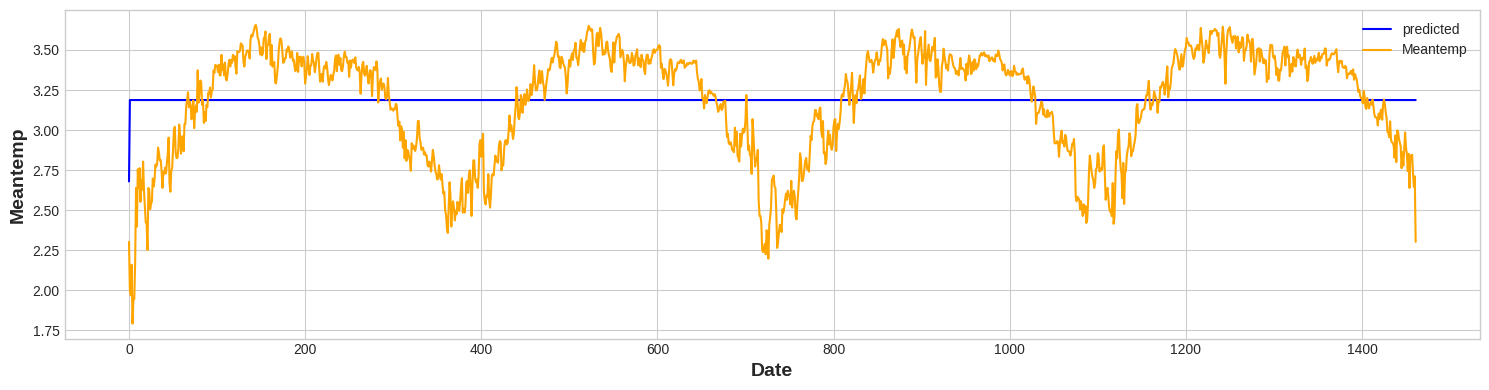

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(15)

sns.lineplot(x=df_train.index, y=y_pred, ax=ax, color='blue', label='predicted') #navajowhite
sns.lineplot(x=df_train.index, y=df_train['meantemp'], ax=ax, color='orange', label='Meantemp') #navajowhite

ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Meantemp', fontsize=14)

plt.show()

## 4.SARIMA Model

In [ ]:
import statsmodels.api as sm

# Define the model
sarima_model = sm.tsa.SARIMAX(df_train.meantemp, order=(1,1,1), seasonal_order=(1,1,1,12))

# Fit the model
sarima_model_fit = sarima_model.fit()

# Generate predictions for the test set using SARIMA
y_pred = sarima_model_fit.forecast(steps=len(df_test))
y_pred_reshaped = y_pred.values.reshape(-1, 1)

# Calculate metrics
sarima_score_mae = mean_absolute_error(df_test.meantemp, y_pred_reshaped)
sarima_score_rmse = math.sqrt(mean_squared_error(df_test.meantemp, y_pred_reshaped))

print('RMSE: {}'.format(sarima_score_rmse))
print('MAE: {}'.format(sarima_score_mae))


RMSE: 20.271765301847868
MAE: 19.24916199833466


## 5.Auto-ARIMA Model

In [ ]:
pip install pmdarima

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(df_train.meantemp, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

In [ ]:
model.fit(df_train.meantemp)

# Make predictions on the validation data
y_pred = model.predict(len(df_train), len(df_test)  - 1)

y_pred_trimmed = y_pred_reshaped[:len(df_test.meantemp)]

# Calculate metrics
auto_score_mae = mean_absolute_error(df_test.meantemp, y_pred_trimmed)
auto_score_rmse = mean_squared_error(df_test.meantemp, y_pred_trimmed, squared=False)

print('RMSE: {}'.format(auto_score_rmse))
print('MAE: {}'.format(auto_score_mae))

RMSE: 20.271765301847868
MAE: 19.24916199833466


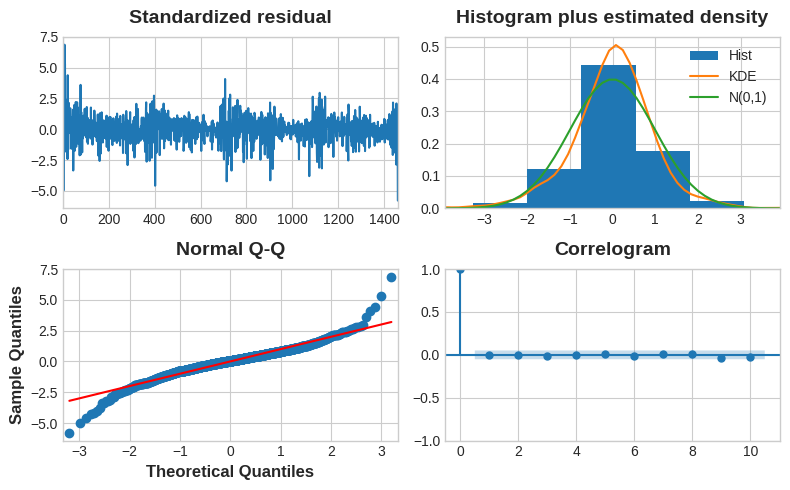

In [ ]:
model.plot_diagnostics(figsize=(8,5))
plt.show()

## 6.LSTM Model

In [ ]:
train_raw = pd.read_csv("/content/DailyDelhiClimateTrain.csv",index_col="date",parse_dates=True)
train_raw.index.freq = "D"

test_raw = pd.read_csv("/content/DailyDelhiClimateTest.csv",index_col="date",parse_dates=True)
test_raw.index.freq = "D"

In [ ]:
# Downsample to monthly means
train = train_raw[["meantemp"]].resample("M").mean()
test = test_raw[["meantemp"]].resample("M").mean()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(train)
train_scaled = scaler.transform(train)
#val_scaled = scaler.transform(val) # Could experiment with cross validation
test_scaled = scaler.transform(test)

In [ ]:
# Define generator that provides n_input data points at a time (e.g. rolling n_input months)
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 9 # Also try 3, 6, 9, 12...
n_features = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length=n_input, batch_size=1)

In [ ]:
# Predict
predictions_scaled = []

# Start with the last n_input data points from train_scaled
first_eval_batch = train_scaled[-n_input:]

# Create current batch with shape 1 x n_input x n_features
current_batch = first_eval_batch.reshape((1, n_input, n_features))

# Predict values over next n_months months
n_months = 36

for i in range(n_months):

  # Get the first prediction value based on the current batch (which contains the last n_input months)
  current_pred = model.predict(current_batch)[0]

  # Store this value in our predictions list
  predictions_scaled.append(current_pred)

  # Add this value to the end of the current batch and remove the first value (e.g. rolling n_input months)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
predictions = scaler.inverse_transform(predictions_scaled)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(128, activation="relu", return_sequences=True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

In [ ]:
history = model.fit(generator, epochs=50)

In [ ]:
from math  import sqrt
LSTM_mae = mean_absolute_error(test, predictions[:len(test)])
LSTM_rmse = sqrt(mean_squared_error(test, predictions[:len(test)]))
print(f"LSTM_MAE: {round(LSTM_mae, 3)}")
print(f"LSTM_RMSE: {round(LSTM_rmse, 3)}")

LSTM_MAE: 1.742
LSTM_RMSE: 1.924


# **Model Comparision**

In [ ]:
# Compare the performance of all models
model_scores = pd.DataFrame({'Model': ['AR', 'MA', 'ARIMA', 'SARIMA', 'AutoARIMA','LSTM'],
                             'MAE': [ar_score_mae, ma_score_mae,  arima_score_mae, sarima_score_mae, auto_score_mae,LSTM_mae],
                             'RMSE': [ar_score_rmse, ma_score_rmse, arima_score_rmse, sarima_score_rmse, auto_score_rmse,LSTM_rmse]})
print(model_scores)


       Model        MAE       RMSE
0         AR  18.881572  19.864415
1         MA  18.530073  19.580854
2      ARIMA  19.200025  20.216662
3     SARIMA  19.249162  20.271765
4  AutoARIMA  19.249162  20.271765
5       LSTM   1.741846   1.924481
